<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4b4a8ad92bba>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Generate Descriptive Statistics and Visualisations

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


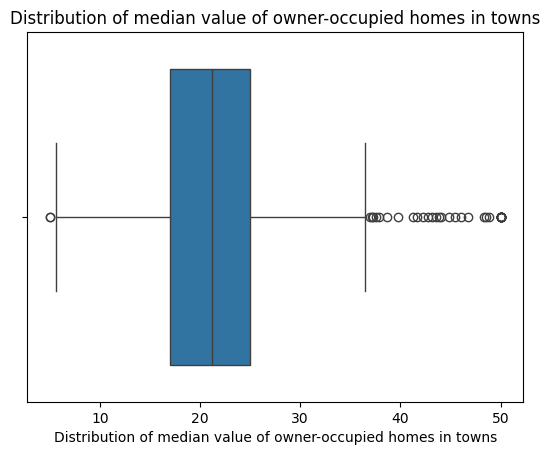

In [6]:
# Boxplot: Median value of owner-occupied homes
sns.boxplot(x=boston_df["MEDV"])

pyplot.xlabel('Distribution of median value of owner-occupied homes in towns')
pyplot.title('Distribution of median value of owner-occupied homes in towns')
pyplot.show()

#### Findings
The boxplot tells us that the majority of towns have 17 to 25 as a median value of owner occupied-homes (this is the interquartile range.)
The median line is at approximately 21.
However, we see that although the interquartile range is fairly narrow, there is still a range of values and a significant amount of outliers, particularly those bigger than the rest of the dataset.

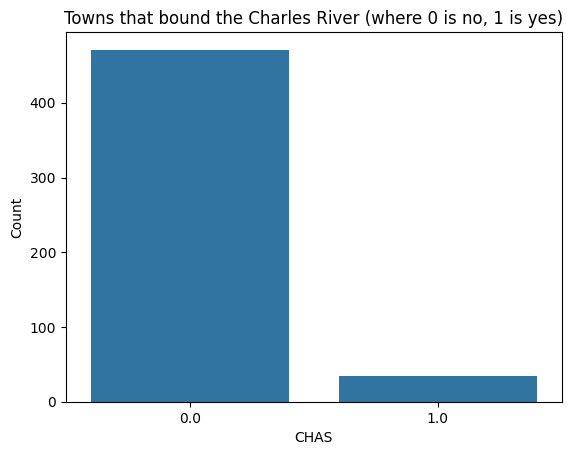

In [7]:
# Bar plot for Charles river variable
sns.countplot(x="CHAS", data=boston_df)
pyplot.title("Towns that bound the Charles River (where 0 is no, 1 is yes)")
pyplot.xlabel("CHAS")
pyplot.ylabel("Count")
pyplot.show()

#### Findings
The majority of towns do not bound the Charles river.

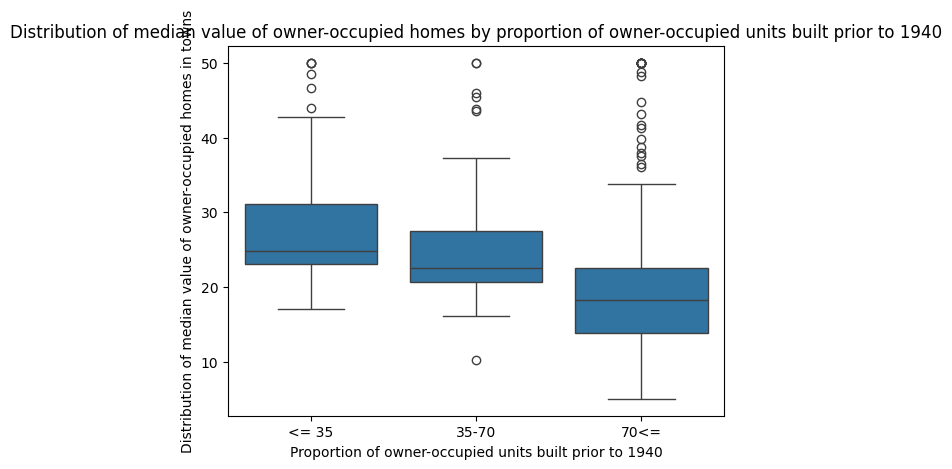

In [8]:
# Boxplot for MEDV vs AGE (discretise age variable into <35, 35-70, 70<)
age_bounds = [(boston_df['AGE'] <= 35), ((35 < boston_df['AGE']) & (boston_df['AGE'] < 70)), (70 <= boston_df['AGE'])]
age_boundaries = ['<= 35', '35-70', '70<=']

boston_df['Age Category'] = np.select(age_bounds, age_boundaries, default='Unknown')
                                      
sns.boxplot(x=boston_df["Age Category"], y=boston_df["MEDV"], order=age_boundaries)
pyplot.xlabel('Proportion of owner-occupied units built prior to 1940')
pyplot.ylabel('Distribution of median value of owner-occupied homes in towns')
pyplot.title('Distribution of median value of owner-occupied homes by proportion of owner-occupied units built prior to 1940')
pyplot.show()

#### Findings
Each boxplot has a similar interquartile range, indicating a relatively even spread in each group.
Towns with a greater proportion of older owner-occupied units built have a lower distribution of median values of owner-occupied homes in towns (indicated by the lower median line and interquartile ranges for the higher proportion categories of owner-occupied units built prior to 1940 on the right.) This indicates that these towns have higher median home values.

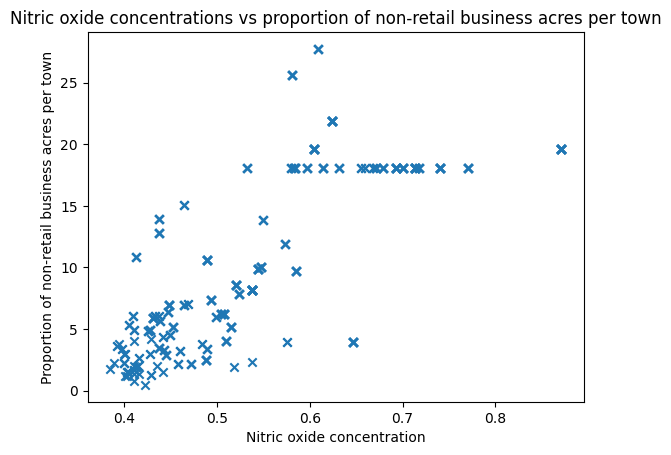

In [9]:
# Scatter plot to show the relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], marker='x')

pyplot.title('Nitric oxide concentrations vs proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxide concentration')
pyplot.ylabel('Proportion of non-retail business acres per town')

pyplot.show()

#### What can be said about this relationship?
There is a positive linear relationship between nitric oxide concentration and proportion of non-retail business acres per town until nitric oxide concentration is approximately 0.58, where the trend generally plateaus at a proportion of about 18 non-retail business acres per town. This tells us that until a certain point, nitric oxide concentration increases as the proportion of non-retail business acres per town increases. After this, nitric oxide concentration continues to increase even if the proportion of non-retail business acres per town remains the same.

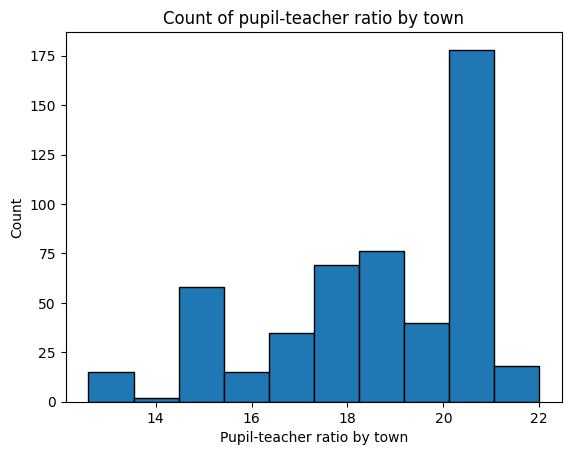

In [10]:
# Histogram for pupil to teacher ratio

pyplot.hist(boston_df['PTRATIO'], edgecolor='black')

pyplot.title('Count of pupil-teacher ratio by town')
pyplot.xlabel('Pupil-teacher ratio by town')
pyplot.ylabel('Count')

pyplot.show()

#### Findings
This histogram tells us the most common pupil-teacher ratio is 21 pupils to a teacher (i.e. this is the mode of the dataset.) Most places have a pupil-teacher ratio between 17 to 21, and none have any outside the range of 13 to 22.

## Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis (H_0): There is no significant difference in the median value of houses between towns that are or are not bounded by the Charles River.

Alternative hypothesis (H_1): There is a significant difference in the median value of houses between towns that are or are not bounded by the Charles River.

In [11]:
charlesRiver = boston_df[boston_df['CHAS'] == 1]['MEDV']
noRiver = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent two-sample t-test
tStat, pValue = scipy.stats.ttest_ind(charlesRiver, noRiver)

# Output the results
print(f"T statistic: {tStat}")
print(f"P value: {pValue}")

T statistic: 3.996437466090509
P value: 7.390623170519905e-05


#### Conclusion:
The p-value is less than the given alpha value of 0.05, so the result is statistically significant. Therefore, we must reject the null hypothesis and accept the alternative hypothesis, which is that there is a significant difference in the median value of houses between towns that are or are not bounded by the Charles River.

The T statistic inicates that the means of the two groups are a significant distance apart from each other.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null hypothesis (H_0): There is no significant difference in the median value of houses across different proportions of owner-occupied units built prior to 1940.

Alternative hypothesis (H_1): There is a significant difference in the median value of houses across different proportions of owner-occupied units built prior to 1940.

In [12]:
# Perform One-Way ANOVA
fStat, pValue = scipy.stats.f_oneway(
    boston_df[boston_df['Age Category'] == "<= 35"]['MEDV'],
    boston_df[boston_df['Age Category'] == "35-70"]['MEDV'],
    boston_df[boston_df['Age Category'] == "70<="]['MEDV']
)

# Output the results
print(f"F statistic: {fStat}")
print(f"P value: {pValue}")

F statistic: 36.40764999196599
P value: 1.7105011022702984e-15


#### Conclusion
The p-value is less than the given alpha value of 0.05, so the result is statistically significant. Therefore, we must reject the null hypothesis and accept the alternative hypothesis, which is that there is a significant difference in the median value of houses across different proportions of owner-occupied units built prior to 1940.

The F statistic inicates that there is significant variance between the two groups.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis (H_0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternative hypothesis (H_1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Given that we are using Pearson's correlation, we are specifically looking for linear relationships.

In [13]:
correlation, pValue = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P value: {pValue}")

Pearson Correlation Coefficient: 0.7636514469209192
P value: 7.913361061210442e-98


#### Conclusion: 
The p-value is less than the given alpha value of 0.05, so the result is statistically significant. Therefore, we must reject the null hypothesis and accept the alternative hypothesis, which is that there is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

The correlation coefficient is positive, indicating that this is a positive linear relationship and the magnitude of the coefficient indicates this is relatively strong.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

regressionModel = sm.OLS(y, x).fit()

print(regressionModel.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        14:56:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Conclusion:
The DIS coefficient is 1.09, indicating a positive relationship between DIS (weighted distances to five Boston employment centers) and the median value of owner occupied homes, where for every increase of 1 in DIS, the median value of a home increases by 1.09 (in thousands of dollars.) The p value indicates that this is statistically significant.